**Goal of the Code:**
Create two plots, one for precipitation and soil liquid water + ice. Plotted is the 21-year running mean of each variable of the land region north of 50°N (y-axis) against the 21-year running mean of the global mean temperature T$_{glob}$ (x-axis) for all scenarios (RCP8.5, CCT, MSB and SAI).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iris
import iris.coord_categorisation
import matplotlib
import iris.analysis.cartography

Define function to calculate running mean of a time series where x = array and w = time span of running mean.

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Load the RAIN, soil liquid water and TS files. The region 74:96 represents everything North of 50°N. CCT03 starts 12 months after the other ensembles, hence why they start at 12. 

In [16]:
path = r""

CCT_Ref_01 = iris.load(path + r"TS_01_sel_var_CCT_cam.all.nc")[0][12:,:,:]
CCT_Ref_02 = iris.load(path + r"TS_02_sel_var_CCT_cam.all.nc")[0][12:,:,:]
CCT_Ref_03 = iris.load(path + r"TS_03_sel_var_CCT_cam.all.nc")[0][:,:,:]

MSB_Ref_01 = iris.load(path + r"TS_01_sel_var_MSB_cam.all.nc")[0][:,:,:]
MSB_Ref_02 = iris.load(path + r"TS_02_sel_var_MSB_cam.all.nc")[0][:,:,:]
MSB_Ref_03 = iris.load(path + r"TS_03_sel_var_MSB_cam.all.nc")[0][:,:,:]

SAI_Ref_01 = iris.load(path + r"TS_01_sel_var_SAI_cam.all.nc")[0][:,:,:]
SAI_Ref_02 = iris.load(path + r"TS_02_sel_var_SAI_cam.all.nc")[0][:,:,:]
SAI_Ref_03 = iris.load(path + r"TS_03_sel_var_SAI_cam.all.nc")[0][:,:,:]

RCP_Ref = iris.load(path + "TS_sel_var_RCP85_cam.all.nc")[0][:,:,:]


CCT_RAIN_01 = iris.load(path + r"RAIN_01_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_RAIN_02 = iris.load(path + r"RAIN_02_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_RAIN_03 = iris.load(path + r"RAIN_03_sel_var_CCT.all.nc")[0][:,74:96,:]

MSB_RAIN_01 = iris.load(path + r"RAIN_01_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_RAIN_02 = iris.load(path + r"RAIN_02_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_RAIN_03 = iris.load(path + r"RAIN_03_sel_var_MSB.all.nc")[0][:,74:96,:]

SAI_RAIN_01 = iris.load(path + r"RAIN_01_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_RAIN_02 = iris.load(path + r"RAIN_02_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_RAIN_03 = iris.load(path + r"RAIN_03_sel_var_SAI.all.nc")[0][:,74:96,:]

RCP_RAIN_01 = iris.load(path + "RAIN_sel_var_RCP85.all.nc")[0][:,74:96,:]


CCT_soil_water_01 = iris.load(path + r"RCP85_CCT_ens01_soil_vars.nc")[3][12:,74:96,:]
CCT_soil_water_02 = iris.load(path + r"RCP85_CCT_ens02_soil_vars.nc")[3][12:,74:96,:]
CCT_soil_water_03 = iris.load(path + r"RCP85_CCT_ens03_soil_vars.nc")[3][:,74:96,:]

MSB_soil_water_01 = iris.load(path + r"RCP85_MSB_ens01_soil_vars.nc")[3][:,74:96,:]
MSB_soil_water_02 = iris.load(path + r"RCP85_MSB_ens02_soil_vars.nc")[3][:,74:96,:]
MSB_soil_water_03 = iris.load(path + r"RCP85_MSB_ens03_soil_vars.nc")[3][:,74:96,:]

SAI_soil_water_01 = iris.load(path + r"RCP85_SAI_ens01_soil_vars.nc")[3][:,74:96,:]
SAI_soil_water_02 = iris.load(path + r"RCP85_SAI_ens02_soil_vars.nc")[3][:,74:96,:]
SAI_soil_water_03 = iris.load(path + r"RCP85_SAI_ens03_soil_vars.nc")[3][:,74:96,:]

RCP_soil_water_01 = iris.load(path + "RCP85_ens01_soil_vars.nc")[3][:,74:96,:]


Create a cosine weighted mean of the loaded area for each dataset.

In [17]:
import warnings
warnings.filterwarnings("ignore") ## To ignore UserWarning about collapsing a non-contagious variable

## RAIN
CCT_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_RAIN_01)
CCT_RAIN_01_weigh_mean = CCT_RAIN_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_01_weigh).data 
CCT_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_RAIN_02)
CCT_RAIN_02_weigh_mean = CCT_RAIN_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_02_weigh).data
CCT_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_RAIN_03)
CCT_RAIN_03_weigh_mean = CCT_RAIN_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_03_weigh).data

MSB_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_RAIN_01)
MSB_RAIN_01_weigh_mean = MSB_RAIN_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_01_weigh).data 
MSB_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_RAIN_02)
MSB_RAIN_02_weigh_mean = MSB_RAIN_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_02_weigh).data 
MSB_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_RAIN_03)
MSB_RAIN_03_weigh_mean = MSB_RAIN_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_03_weigh).data 

SAI_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_RAIN_01)
SAI_RAIN_01_weigh_mean = SAI_RAIN_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_01_weigh).data 
SAI_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_RAIN_02)
SAI_RAIN_02_weigh_mean = SAI_RAIN_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_02_weigh).data 
SAI_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_RAIN_03)
SAI_RAIN_03_weigh_mean = SAI_RAIN_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_03_weigh).data 

RCP_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_RAIN_01)
RCP_RAIN_01_weigh_mean = RCP_RAIN_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_01_weigh).data

## soil_water
CCT_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_soil_water_01)
CCT_soil_water_01_weigh_mean = CCT_soil_water_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_01_weigh).data 
CCT_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_soil_water_02)
CCT_soil_water_02_weigh_mean = CCT_soil_water_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_02_weigh).data
CCT_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_soil_water_03)
CCT_soil_water_03_weigh_mean = CCT_soil_water_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_03_weigh).data

MSB_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_soil_water_01)
MSB_soil_water_01_weigh_mean = MSB_soil_water_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_01_weigh).data 
MSB_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_soil_water_02)
MSB_soil_water_02_weigh_mean = MSB_soil_water_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_02_weigh).data 
MSB_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_soil_water_03)
MSB_soil_water_03_weigh_mean = MSB_soil_water_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_03_weigh).data 

SAI_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_soil_water_01)
SAI_soil_water_01_weigh_mean = SAI_soil_water_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_01_weigh).data 
SAI_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_soil_water_02)
SAI_soil_water_02_weigh_mean = SAI_soil_water_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_02_weigh).data 
SAI_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_soil_water_03)
SAI_soil_water_03_weigh_mean = SAI_soil_water_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_03_weigh).data 

RCP_01_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_soil_water_01)
RCP_soil_water_01_weigh_mean = RCP_soil_water_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_01_weigh).data

## Tglob (= land and ocean)
CCT_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_01)
CCT_Ref_01_weigh_mean = CCT_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_01_weigh).data 
CCT_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_02)
CCT_Ref_02_weigh_mean = CCT_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_02_weigh).data 
CCT_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(CCT_Ref_03)
CCT_Ref_03_weigh_mean = CCT_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = CCT_Ref_03_weigh).data 

MSB_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_01)
MSB_Ref_01_weigh_mean = MSB_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_01_weigh).data 
MSB_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_02)
MSB_Ref_02_weigh_mean = MSB_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_02_weigh).data 
MSB_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(MSB_Ref_03)
MSB_Ref_03_weigh_mean = MSB_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = MSB_Ref_03_weigh).data 

SAI_Ref_01_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_01)
SAI_Ref_01_weigh_mean = SAI_Ref_01.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_01_weigh).data 
SAI_Ref_02_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_02)
SAI_Ref_02_weigh_mean = SAI_Ref_02.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_02_weigh).data 
SAI_Ref_03_weigh = iris.analysis.cartography.cosine_latitude_weights(SAI_Ref_03)
SAI_Ref_03_weigh_mean = SAI_Ref_03.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = SAI_Ref_03_weigh).data 

RCP_Ref_weigh = iris.analysis.cartography.cosine_latitude_weights(RCP_Ref)
RCP_Ref_weigh_mean = RCP_Ref.collapsed(["latitude","longitude"], iris.analysis.MEAN, weights = RCP_Ref_weigh).data 


CCT and MSB have a missing month in the second ensembles in all cam datasets. The missing month is at [264] in CCT02 and [531] in MSB02. Hence, for this position, the mean of the other two ensembles is calculated and inserted instead.

In [18]:
## Tglob (cam)
CCT_Ref_02_array = (CCT_Ref_02_weigh_mean.data)
CCT_Ref_02_list = CCT_Ref_02_array.tolist()
CCT_Ref_02_list.insert(264-12, (CCT_Ref_01_weigh_mean[264-12] + CCT_Ref_03_weigh_mean[264-12]) / 2) ## 264 - 12 since we start CCT02 from 12 and not from 0
CCT_Ref_01_array = CCT_Ref_01_weigh_mean.data
CCT_Ref_01_list = CCT_Ref_01_array.tolist()
CCT_Ref_03_array = CCT_Ref_03_weigh_mean.data
CCT_Ref_03_list = CCT_Ref_03_array.tolist()

MSB_Ref_02_array = (MSB_Ref_02_weigh_mean.data)
MSB_Ref_02_list = MSB_Ref_02_array.tolist()
MSB_Ref_02_list.insert(531, (MSB_Ref_01_weigh_mean[531] + MSB_Ref_03_weigh_mean[531]) / 2)
MSB_Ref_01_array = MSB_Ref_01_weigh_mean.data
MSB_Ref_01_list = MSB_Ref_01_array.tolist()
MSB_Ref_03_array = MSB_Ref_03_weigh_mean.data
MSB_Ref_03_list = MSB_Ref_03_array.tolist()

Calculate the boreal summer mean for the precipitation and soil liquid water datasets. CCT has 960 months, SAI and MSB 972 months and RCP8.5 1140 months.

In [19]:
CCT_01_year_RAIN = []
CCT_02_year_RAIN = []
CCT_03_year_RAIN = []
CCT_01_year_soil_water = []
CCT_02_year_soil_water = []
CCT_03_year_soil_water = []
CCT_01_year_Ref = []
CCT_02_year_Ref = []
CCT_03_year_Ref = []

i = 0
while i in range(0,960):
    CCT_01_year_RAIN.append(np.mean(CCT_RAIN_01_weigh_mean[i+5:i+8].data))
    CCT_02_year_RAIN.append(np.mean(CCT_RAIN_02_weigh_mean[i+5:i+8].data))
    CCT_03_year_RAIN.append(np.mean(CCT_RAIN_03_weigh_mean[i+5:i+8].data))
    
    CCT_01_year_soil_water.append(np.mean(CCT_soil_water_01_weigh_mean[i+5:i+8].data))
    CCT_02_year_soil_water.append(np.mean(CCT_soil_water_02_weigh_mean[i+5:i+8].data))
    CCT_03_year_soil_water.append(np.mean(CCT_soil_water_03_weigh_mean[i+5:i+8].data))
    
    CCT_01_year_Ref.append(np.mean(CCT_Ref_01_list[i:i+12]))
    CCT_02_year_Ref.append(np.mean(CCT_Ref_02_list[i:i+12]))
    CCT_03_year_Ref.append(np.mean(CCT_Ref_03_list[i:i+12]))
    i = i + 12
    
MSB_01_year_RAIN = []
MSB_02_year_RAIN = []
MSB_03_year_RAIN = []
SAI_01_year_RAIN = []
SAI_02_year_RAIN = []
SAI_03_year_RAIN = []
MSB_01_year_soil_water = []
MSB_02_year_soil_water = []
MSB_03_year_soil_water = []
SAI_01_year_soil_water = []
SAI_02_year_soil_water = []
SAI_03_year_soil_water = []
MSB_01_year_Ref = []
MSB_02_year_Ref = []
MSB_03_year_Ref = []
SAI_01_year_Ref = []
SAI_02_year_Ref = []
SAI_03_year_Ref = []

i = 0
while i in range(0,972):
    MSB_01_year_RAIN.append(np.mean(MSB_RAIN_01_weigh_mean[i+5:i+8].data))
    MSB_02_year_RAIN.append(np.mean(MSB_RAIN_02_weigh_mean[i+5:i+8].data))
    MSB_03_year_RAIN.append(np.mean(MSB_RAIN_03_weigh_mean[i+5:i+8].data))
    SAI_01_year_RAIN.append(np.mean(SAI_RAIN_01_weigh_mean[i+5:i+8].data))
    SAI_02_year_RAIN.append(np.mean(SAI_RAIN_02_weigh_mean[i+5:i+8].data))
    SAI_03_year_RAIN.append(np.mean(SAI_RAIN_03_weigh_mean[i+5:i+8].data))
    
    MSB_01_year_soil_water.append(np.mean(MSB_soil_water_01_weigh_mean[i+5:i+8].data))
    MSB_02_year_soil_water.append(np.mean(MSB_soil_water_02_weigh_mean[i+5:i+8].data))
    MSB_03_year_soil_water.append(np.mean(MSB_soil_water_03_weigh_mean[i+5:i+8].data))
    SAI_01_year_soil_water.append(np.mean(SAI_soil_water_01_weigh_mean[i+5:i+8].data))
    SAI_02_year_soil_water.append(np.mean(SAI_soil_water_02_weigh_mean[i+5:i+8].data))
    SAI_03_year_soil_water.append(np.mean(SAI_soil_water_03_weigh_mean[i+5:i+8].data))
    
    MSB_01_year_Ref.append(np.mean(MSB_Ref_01_list[i:i+12]))
    MSB_02_year_Ref.append(np.mean(MSB_Ref_02_list[i:i+12]))
    MSB_03_year_Ref.append(np.mean(MSB_Ref_03_list[i:i+12]))
    SAI_01_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    SAI_02_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    SAI_03_year_Ref.append(np.mean(SAI_Ref_01_weigh_mean[i:i+12].data))
    i = i + 12

RCP_01_year_RAIN = []
RCP_01_year_Ref = []
RCP_01_year_soil_water = []

i = 0
while i in range(0,1140):
    RCP_01_year_RAIN.append(np.mean(RCP_RAIN_01_weigh_mean[i+5:i+8].data))
    RCP_01_year_soil_water.append(np.mean(RCP_soil_water_01_weigh_mean[i+5:i+8].data))
    RCP_01_year_Ref.append(np.mean(RCP_Ref_weigh_mean[i:i+12].data))
    i = i + 12

Calculate the 21-year running mean for each dataset.

In [20]:
CCT_RAIN_roll_mean_01 = moving_average(CCT_01_year_RAIN, 21)
CCT_RAIN_roll_mean_02 = moving_average(CCT_02_year_RAIN, 21)
CCT_RAIN_roll_mean_03 = moving_average(CCT_03_year_RAIN, 21)
MSB_RAIN_roll_mean_01 = moving_average(MSB_01_year_RAIN, 21)
MSB_RAIN_roll_mean_02 = moving_average(MSB_02_year_RAIN, 21)
MSB_RAIN_roll_mean_03 = moving_average(MSB_03_year_RAIN, 21)
SAI_RAIN_roll_mean_01 = moving_average(SAI_01_year_RAIN, 21)
SAI_RAIN_roll_mean_02 = moving_average(SAI_02_year_RAIN, 21)
SAI_RAIN_roll_mean_03 = moving_average(SAI_03_year_RAIN, 21)
RCP_RAIN_roll_mean = moving_average(RCP_01_year_RAIN, 21)

CCT_soil_water_roll_mean_01 = moving_average(CCT_01_year_soil_water, 21)
CCT_soil_water_roll_mean_02 = moving_average(CCT_02_year_soil_water, 21)
CCT_soil_water_roll_mean_03 = moving_average(CCT_03_year_soil_water, 21)
MSB_soil_water_roll_mean_01 = moving_average(MSB_01_year_soil_water, 21)
MSB_soil_water_roll_mean_02 = moving_average(MSB_02_year_soil_water, 21)
MSB_soil_water_roll_mean_03 = moving_average(MSB_03_year_soil_water, 21)
SAI_soil_water_roll_mean_01 = moving_average(SAI_01_year_soil_water, 21)
SAI_soil_water_roll_mean_02 = moving_average(SAI_02_year_soil_water, 21)
SAI_soil_water_roll_mean_03 = moving_average(SAI_03_year_soil_water, 21)
RCP_soil_water_roll_mean = moving_average(RCP_01_year_soil_water, 21)

CCT_Ref_roll_mean_01 = moving_average(CCT_01_year_Ref, 21)
CCT_Ref_roll_mean_02 = moving_average(CCT_02_year_Ref, 21)
CCT_Ref_roll_mean_03 = moving_average(CCT_03_year_Ref, 21)
MSB_Ref_roll_mean_01 = moving_average(MSB_01_year_Ref, 21)
MSB_Ref_roll_mean_02 = moving_average(MSB_02_year_Ref, 21)
MSB_Ref_roll_mean_03 = moving_average(MSB_03_year_Ref, 21)
SAI_Ref_roll_mean_01 = moving_average(SAI_01_year_Ref, 21)
SAI_Ref_roll_mean_02 = moving_average(SAI_02_year_Ref, 21)
SAI_Ref_roll_mean_03 = moving_average(SAI_03_year_Ref, 21)
RCP_Ref_roll_mean = moving_average(RCP_01_year_Ref, 21)

Calculate the mean of the three ensembles for CCT, MSB and SAI.

In [21]:
CCT_RAIN_mean = (CCT_RAIN_roll_mean_01 + CCT_RAIN_roll_mean_02 + CCT_RAIN_roll_mean_03) / 3
MSB_RAIN_mean = (MSB_RAIN_roll_mean_01 + MSB_RAIN_roll_mean_02 + MSB_RAIN_roll_mean_03) / 3
SAI_RAIN_mean = (SAI_RAIN_roll_mean_01 + SAI_RAIN_roll_mean_02 + SAI_RAIN_roll_mean_03) / 3

CCT_soil_water_mean = (CCT_soil_water_roll_mean_01 + CCT_soil_water_roll_mean_02 + CCT_soil_water_roll_mean_03) / 3
MSB_soil_water_mean = (MSB_soil_water_roll_mean_01 + MSB_soil_water_roll_mean_02 + MSB_soil_water_roll_mean_03) / 3
SAI_soil_water_mean = (SAI_soil_water_roll_mean_01 + SAI_soil_water_roll_mean_02 + SAI_soil_water_roll_mean_03) / 3

CCT_Ref_mean = (CCT_Ref_roll_mean_01 + CCT_Ref_roll_mean_02 + CCT_Ref_roll_mean_03) / 3
MSB_Ref_mean = (MSB_Ref_roll_mean_01 + MSB_Ref_roll_mean_02 + MSB_Ref_roll_mean_03) / 3
SAI_Ref_mean = (SAI_Ref_roll_mean_01 + SAI_Ref_roll_mean_02 + SAI_Ref_roll_mean_03) / 3

Calculate the anomalies based on the first 21 years of RCP8.5. 

In [22]:
CTT_RAIN_Anomaly = CCT_RAIN_mean - RCP_RAIN_roll_mean[0]
MSB_RAIN_Anomaly = MSB_RAIN_mean - RCP_RAIN_roll_mean[0]
SAI_RAIN_Anomaly = SAI_RAIN_mean - RCP_RAIN_roll_mean[0]
RCP_RAIN_Anomaly = RCP_RAIN_roll_mean - RCP_RAIN_roll_mean[0]

CTT_soil_water_Anomaly = CCT_soil_water_mean - RCP_soil_water_roll_mean[0]
MSB_soil_water_Anomaly = MSB_soil_water_mean - RCP_soil_water_roll_mean[0]
SAI_soil_water_Anomaly = SAI_soil_water_mean - RCP_soil_water_roll_mean[0]
RCP_soil_water_Anomaly = RCP_soil_water_roll_mean - RCP_soil_water_roll_mean[0]

CCT_Ref_Anomaly = CCT_Ref_mean - RCP_Ref_roll_mean[0]
SAI_Ref_Anomaly = SAI_Ref_mean - RCP_Ref_roll_mean[0]
MSB_Ref_Anomaly = MSB_Ref_mean - RCP_Ref_roll_mean[0]
RCP_Ref_Anomaly = RCP_Ref_roll_mean - RCP_Ref_roll_mean[0]

To fill the ensemble spread, the maximum and minimum as anomaly from RCP[0] for every index is calculated.

In [29]:
CCT_RAIN_max = []
CCT_RAIN_min = []
MSB_RAIN_max = []
MSB_RAIN_min = []
SAI_RAIN_max = []
SAI_RAIN_min = []

for i in range(0, len(CCT_RAIN_roll_mean_01)):
    CCT_RAIN_max.append(max(CCT_RAIN_roll_mean_01[i] - RCP_RAIN_roll_mean[0], CCT_RAIN_roll_mean_02[i] - RCP_RAIN_roll_mean[0], CCT_RAIN_roll_mean_03[i] - RCP_RAIN_roll_mean[0])*86400)
    CCT_RAIN_min.append(min(CCT_RAIN_roll_mean_01[i] - RCP_RAIN_roll_mean[0], CCT_RAIN_roll_mean_02[i] - RCP_RAIN_roll_mean[0], CCT_RAIN_roll_mean_03[i] - RCP_RAIN_roll_mean[0])*86400)    
for i in range(0, len(MSB_RAIN_roll_mean_01)):
    MSB_RAIN_max.append(max(MSB_RAIN_roll_mean_01[i]- RCP_RAIN_roll_mean[0], MSB_RAIN_roll_mean_02[i]- RCP_RAIN_roll_mean[0], MSB_RAIN_roll_mean_03[i]- RCP_RAIN_roll_mean[0])*86400)
    MSB_RAIN_min.append(min(MSB_RAIN_roll_mean_01[i]- RCP_RAIN_roll_mean[0], MSB_RAIN_roll_mean_02[i]- RCP_RAIN_roll_mean[0], MSB_RAIN_roll_mean_03[i]- RCP_RAIN_roll_mean[0])*86400)
    SAI_RAIN_max.append(max(SAI_RAIN_roll_mean_01[i]- RCP_RAIN_roll_mean[0], SAI_RAIN_roll_mean_02[i]- RCP_RAIN_roll_mean[0], SAI_RAIN_roll_mean_03[i]- RCP_RAIN_roll_mean[0])*86400)
    SAI_RAIN_min.append(min(SAI_RAIN_roll_mean_01[i]- RCP_RAIN_roll_mean[0], SAI_RAIN_roll_mean_02[i]- RCP_RAIN_roll_mean[0], SAI_RAIN_roll_mean_03[i]- RCP_RAIN_roll_mean[0])*86400)

CCT_soil_water_max = []
CCT_soil_water_min = []
MSB_soil_water_max = []
MSB_soil_water_min = []
SAI_soil_water_max = []
SAI_soil_water_min = []

for i in range(0, len(CCT_soil_water_roll_mean_01)):
    CCT_soil_water_max.append(max(CCT_soil_water_roll_mean_01[i] - RCP_soil_water_roll_mean[0], CCT_soil_water_roll_mean_02[i] - RCP_soil_water_roll_mean[0], CCT_soil_water_roll_mean_03[i] - RCP_soil_water_roll_mean[0]))
    CCT_soil_water_min.append(min(CCT_soil_water_roll_mean_01[i] - RCP_soil_water_roll_mean[0], CCT_soil_water_roll_mean_02[i] - RCP_soil_water_roll_mean[0], CCT_soil_water_roll_mean_03[i] - RCP_soil_water_roll_mean[0]))
for i in range(0, len(MSB_soil_water_roll_mean_01)):
    MSB_soil_water_max.append(max(MSB_soil_water_roll_mean_01[i]- RCP_soil_water_roll_mean[0], MSB_soil_water_roll_mean_02[i]- RCP_soil_water_roll_mean[0], MSB_soil_water_roll_mean_03[i]- RCP_soil_water_roll_mean[0]))
    MSB_soil_water_min.append(min(MSB_soil_water_roll_mean_01[i]- RCP_soil_water_roll_mean[0], MSB_soil_water_roll_mean_02[i]- RCP_soil_water_roll_mean[0], MSB_soil_water_roll_mean_03[i]- RCP_soil_water_roll_mean[0]))
    SAI_soil_water_max.append(max(SAI_soil_water_roll_mean_01[i]- RCP_soil_water_roll_mean[0], SAI_soil_water_roll_mean_02[i]- RCP_soil_water_roll_mean[0], SAI_soil_water_roll_mean_03[i]- RCP_soil_water_roll_mean[0]))
    SAI_soil_water_min.append(min(SAI_soil_water_roll_mean_01[i]- RCP_soil_water_roll_mean[0], SAI_soil_water_roll_mean_02[i]- RCP_soil_water_roll_mean[0], SAI_soil_water_roll_mean_03[i]- RCP_soil_water_roll_mean[0]))

Create plot with three subplots. ax1 = soil_liquid_water, ax2 = RAIN.

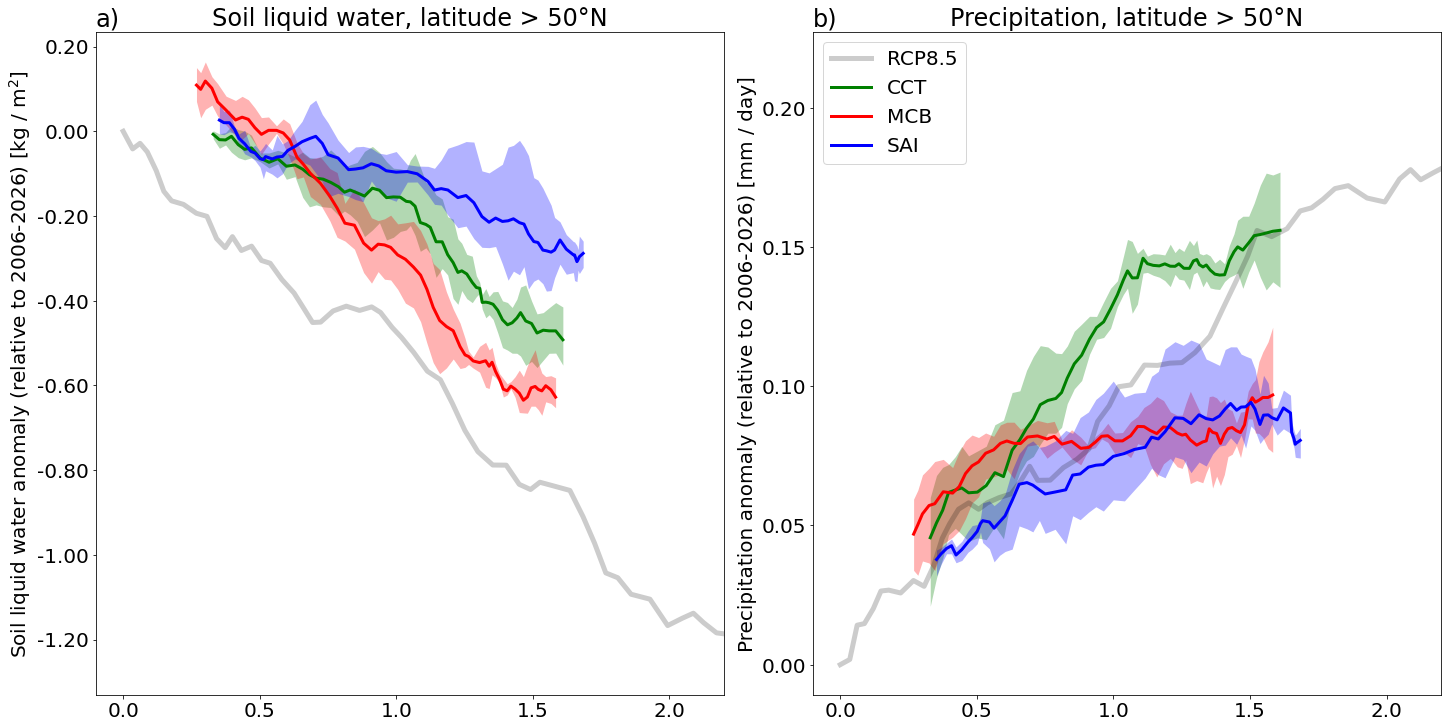

In [30]:
from matplotlib.ticker import FormatStrFormatter

matplotlib.rcParams.update({'font.size': 20})
fig, (ax1, ax2 ) = plt.subplots(1, 2,  sharex = True, figsize = (20,10), constrained_layout = True) # sharey = True,

plt.ylim = (-0.1, 7)

ax2.plot(RCP_Ref_Anomaly, RCP_RAIN_Anomaly*86400, color = "black", label = "RCP8.5", linewidth=5.0, alpha = 0.2)

ax2.fill_between(CCT_Ref_Anomaly, CCT_RAIN_max, CCT_RAIN_min, color = "green", alpha = 0.3, lw=0)
ax2.fill_between(MSB_Ref_Anomaly, MSB_RAIN_max, MSB_RAIN_min, color = "red", alpha = 0.3, lw=0)
ax2.fill_between(SAI_Ref_Anomaly, SAI_RAIN_max, SAI_RAIN_min, color = "blue", alpha = 0.3, lw=0)

ax2.plot(CCT_Ref_Anomaly, CTT_RAIN_Anomaly*86400, color = "green", label = "CCT", linewidth=3.0)
ax2.plot(MSB_Ref_Anomaly, MSB_RAIN_Anomaly*86400, color = "red", label = "MCB", linewidth=3.0)
ax2.plot(SAI_Ref_Anomaly, SAI_RAIN_Anomaly*86400, color = "blue", label = "SAI", linewidth=3.0)

#ax2.set_ylim(-0.1,7)
ax2.set_xlim(-0.1,2.2)
ax2.set_ylabel("Precipitation anomaly (relative to 2006-2026) [mm / day]")
ax2.set_title("Precipitation, latitude > 50°N")
ax2.set_title('b)', loc='left')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.legend(loc = "upper left")

ax1.plot(RCP_Ref_Anomaly, RCP_soil_water_Anomaly, color = "black", label = "RCP8.5", linewidth=5.0, alpha = 0.2)

ax1.fill_between(CCT_Ref_Anomaly, CCT_soil_water_max, CCT_soil_water_min, color = "green", alpha = 0.3, lw=0)
ax1.fill_between(MSB_Ref_Anomaly, MSB_soil_water_max, MSB_soil_water_min, color = "red", alpha = 0.3, lw=0)
ax1.fill_between(SAI_Ref_Anomaly, SAI_soil_water_max, SAI_soil_water_min, color = "blue", alpha = 0.3, lw=0)

ax1.plot(CCT_Ref_Anomaly, CTT_soil_water_Anomaly, color = "green", label = "CCT", linewidth=3.0)
ax1.plot(MSB_Ref_Anomaly, MSB_soil_water_Anomaly, color = "red", label = "MCB", linewidth=3.0)
ax1.plot(SAI_Ref_Anomaly, SAI_soil_water_Anomaly, color = "blue", label = "SAI", linewidth=3.0)

#ax1.set_ylim(-0.1,7)
ax1.set_xlim(-0.1,2.2)
ax1.set_ylabel("Soil liquid water anomaly (relative to 2006-2026) [kg / m$^2$]")
ax1.set_title("Soil liquid water, latitude > 50°N")
ax1.set_title('a)', loc='left')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
